<a href="https://colab.research.google.com/github/masoud-n91/MachineLearning/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.replace(("female", "male"), (0, 1), inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [17]:
data["Embarked"].replace(("S", "C", "Q"), (0, 1, 2), inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0
5,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0,1


In [18]:
data.fillna(0, inplace=True)

In [ ]:
# temp_df = data.dropna(subset=['Age'])
# age_list = temp_df['Age'].tolist()
# mean_age = np.mean(age_list)
# data.fillna(mean_age, inplace=True)

In [19]:
X = np.array(data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]])
Y = np.array(data[["Survived"]])

In [20]:
# X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

**Model**

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation="relu"), # input layer
    tf.keras.layers.Dense(36, activation="relu"), # first hidden layer
    tf.keras.layers.Dense(16, activation="relu"), # Second hidden layer
    tf.keras.layers.Dense(2, activation="softmax") # Output layer
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [28]:
output = model.fit(X,Y, epochs=300)

Epoch 1/300
28/28 [==============================] - 1s 2ms/step - loss: 1.3218 - accuracy: 0.6285
Epoch 2/300
28/28 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.6779
Epoch 3/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6779
Epoch 4/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.6869
Epoch 5/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6678
Epoch 6/300
28/28 [==============================] - 0s 3ms/step - loss: 0.6162 - accuracy: 0.6756
Epoch 7/300
28/28 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.6835
Epoch 8/300
28/28 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.6824
Epoch 9/300
28/28 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6869
Epoch 10/300
28/28 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6880
Epoch 11/

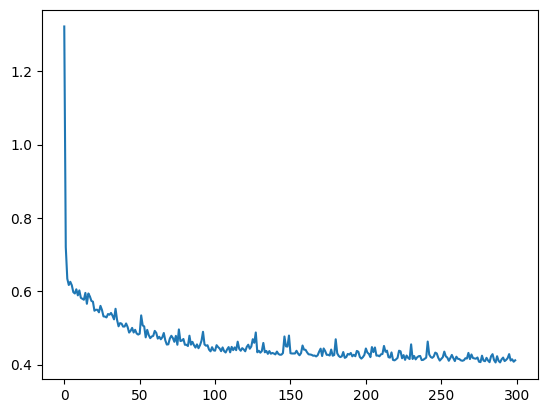

In [29]:
plt.plot(output.history["loss"])
plt.show()

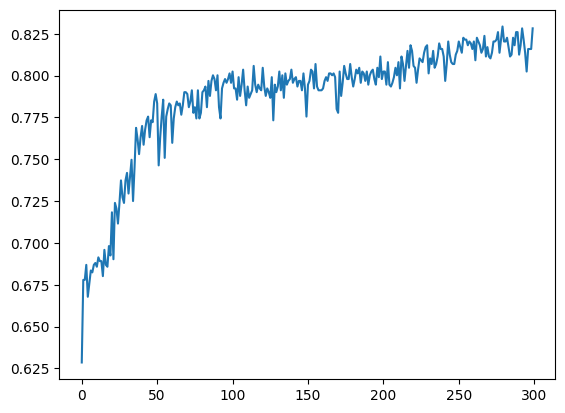

In [30]:
plt.plot(output.history["accuracy"])
plt.show()